In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

C = [-11  -7  -3   1   5   9]


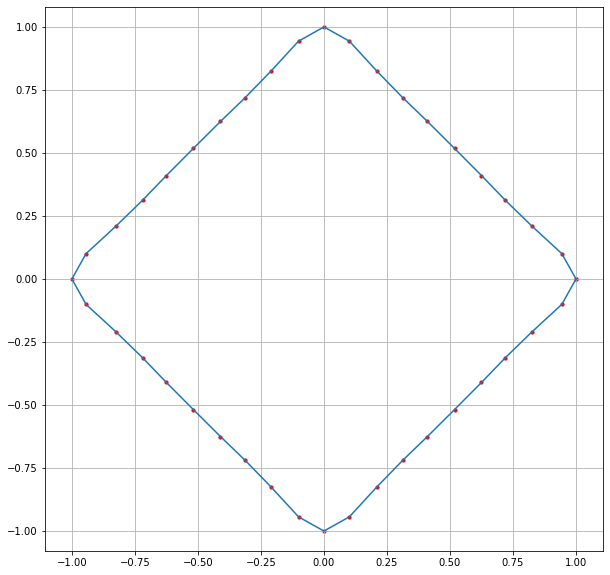

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = 4
p = n * 10
theta = np.linspace(0, 2*np.pi, p+1)
F = 6
C = np.array([(1 + f * n) for f in range(-F//2, F//2)])
print('C =', C)
V = sum([1 / c**2 * np.exp(1j * c * theta) for c in C]) / sum(1 / C**2)

X = V.real
Y = V.imag

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.grid()
ax.axis('equal')
ax.plot(X, Y)
ax.scatter(X, Y, s=10, c='red')
#plt.savefig('fig.png')

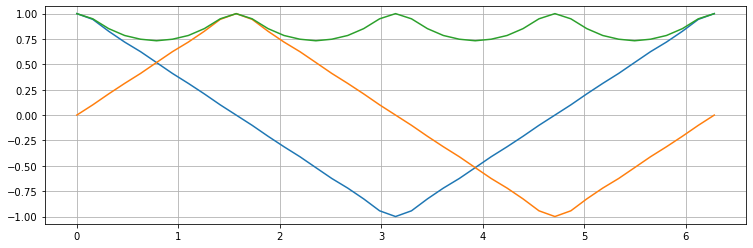

In [4]:
plt.figure(figsize=(np.pi*2*2, 2*2))
plt.axis('equal')
plt.grid()
#plt.plot(theta, abs(V))
plt.plot(theta, V.real, theta, V.imag, theta, abs(V))

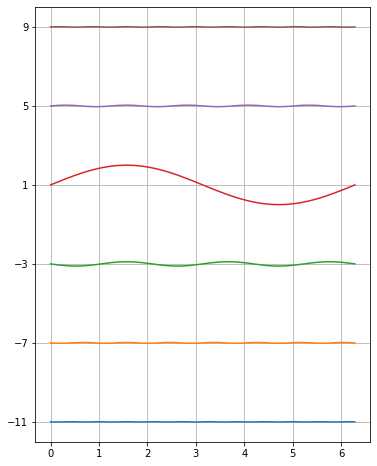

In [5]:
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yticks(C)

for c in C:
    V = 1 / c**2 * np.exp(1j * c * theta)
    ax.plot(theta, V.imag+c)

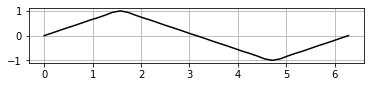

In [6]:
V = 0
for c in C:
    V += 1 / c**2 * np.exp(1j * c * theta)
V /= sum(1/C**2)

fig = plt.figure(figsize=(6, 1))
ax = fig.add_subplot(111)
ax.grid()
plt.plot(theta, V.imag, c='k')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

n = 3 # n-gon
p = n * 10
theta = np.linspace(0, 2*np.pi, p+1)
F = 20
C = np.array([(1 + f * n) for f in range(-F//2, F//2)])
#print('C =', C)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.grid()
ax.axis('equal')

ims = []
X = []
Y = []
for t in theta:
    V = sum([1 / c**2 * np.exp(1j * c * t) for c in C]) / sum(1 / C**2)
    x = V.real
    y = V.imag
    X.append(x)
    Y.append(y)
    P1 = ax.plot(X, Y, c='tab:blue')
    P2 = ax.scatter(x, y, s=40, c='red')
    ims.append(P1 + [P2])

#plt.savefig('n_' + str(n) + '.png')
ani = animation.ArtistAnimation(fig, ims, interval=150)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('n_' + str(n) + '.mp4', writer="ffmpeg")
plt.close()
HTML(ani.to_jshtml())

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

n = 4
p = n * 20
theta = np.linspace(0, 2*np.pi, p+1)
F = 20
C = np.array([(1 + f * n) for f in range(-F//2, F//2)])
AS = np.argsort(abs(C))
C = C[AS]
#print('C =', C)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.grid()
ax.axis('equal')

ims = []
cir = np.linspace(0, 2*np.pi, 65)
LN = np.array([])
for t in theta:
    VR = np.array([])
    V = np.array([0])
    v = 0
    for c in C:
        vr = 1 / c**2 * np.exp(1j * c * t) / sum(1 / C**2)
        VR = np.append(VR, vr)
        v += vr
        V = np.append(V, v)
     
    P1 = ax.plot(V.real, V.imag, c='blue')
    
    cr = abs(VR) * np.exp(1j * C * np.vstack(cir))
    P2 = ax.plot(V[:-1].real + cr.real, V[:-1].imag + cr.imag, c='gray', alpha=0.5)
    
    LN = np.append(LN, V[-1])
    P3 = ax.plot(LN.real, LN.imag, c='tab:blue')
    P4 = ax.scatter(V[-1].real, V[-1].imag, s=40, c='red')

    ims.append(P1 + P2 + P3 + [P4])
    
ani = animation.ArtistAnimation(fig, ims, interval=100)
#ani.save('epi.gif', writer="imagemagick")
#ani.save('epi.mp4', writer="ffmpeg")
plt.close()
#HTML(ani.to_jshtml())
HTML(ani.to_html5_video())

In [1]:
def dft(f):
    N = len(f)
    Y = []
    for x in range(N):
        y = 0
        for t in range(N):
            y += f[t] * np.exp(-2j * np.pi * t * x / N)
        Y.append(y)
    return np.array(Y)

def idft(F):
    N = len(F)
    Y = []
    for x in range(N):
        y = 0
        for t in range(N):
            y += F[t] * np.exp(2j * np.pi * t * x / N)
        Y.append(y)
    return np.array(Y) / N

C = [-29 -26 -23 -20 -17 -14 -11  -8  -5  -2   1   4   7  10  13  16  19  22
  25  28]


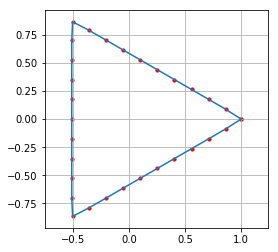

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 3
p = n * 10
theta = np.linspace(0, 2*np.pi, p+1)
F = 20
C = np.array([(1 + f * n) for f in range(-F//2, F//2)])
print('C =', C)
V = sum([1 / c**2 * np.exp(1j * c * theta) for c in C]) / sum(1 / C**2)
X = V.real
Y = V.imag

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.grid()
ax.axis('equal')
ax.plot(X, Y)
ax.scatter(X, Y, s=10, c='red')

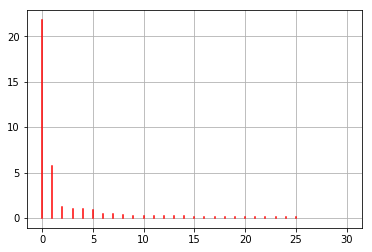

In [120]:
VD = dft(V)
AS = np.argsort(abs(VD))[::-1]

for i in range(len(VD)):
    plt.plot([i, i], [0, abs(VD[AS[i]])], c='red')
plt.grid()

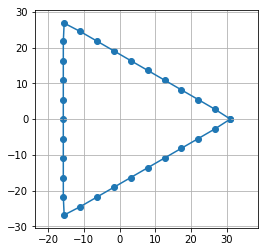

In [121]:
N = len(VD)
VS = np.array([sum([VD[AS[t]] * np.exp(2j * np.pi * AS[t]/N * k) for t in range(N)]) for k in range(N)])

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.grid()
ax.axis('equal')
plt.plot(VS.real, VS.imag)
plt.scatter(VS.real, VS.imag)